# Low Rank Decompositions of STFT Tensors
## Nicholas Richardson
## November 30, 2022

Quick abstrct: use tensor decompositions to analyse musical instruments
What's to come:
- Construct a tensor where each slice is a STFT
- Decompose it with ALS
- Plot and *listen* to the result

In [10]:
# Dependencies
add_pkgs = false
if add_pkgs
    import Pkg
    Pkg.add("FFTW")
    Pkg.add("Plots")
    Pkg.add("WAV")
    Pkg.add("STFT")
    Pkg.add("TensorDecompositions")
    #include(".\\src\\songstrings.jl")
    #include(".\\src\\utils.jl")
end

    Updating registry at `C:\Users\Nicholas\.julia\registries\General.toml`


   Resolving package versions...


  No Changes to `C:\Users\Nicholas\OneDrive - UBC\UBC\Courses\MATH 605D Tensors\Final Project\TensorDecompSTFT\Project.toml`
  No Changes to `C:\Users\Nicholas\OneDrive - UBC\UBC\Courses\MATH 605D Tensors\Final Project\TensorDecompSTFT\Manifest.toml`


Precompiling project...

  ✗ TensorDecompSTFT
  0 dependencies successfully precompiled in 21 seconds. 169 already precompiled.
  1 dependency errored. To see a full report either run `import Pkg; Pkg.precompile()` or load the package


   Resolving package versions...


  No Changes to `C:\Users\Nicholas\OneDrive - UBC\UBC\Courses\MATH 605D Tensors\Final Project\TensorDecompSTFT\Project.toml`
  No Changes to `C:\Users\Nicholas\OneDrive - UBC\UBC\Courses\MATH 605D Tensors\Final Project\TensorDecompSTFT\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\Nicholas\OneDrive - UBC\UBC\Courses\MATH 605D Tensors\Final Project\TensorDecompSTFT\Project.toml`
  No Changes to `C:\Users\Nicholas\OneDrive - UBC\UBC\Courses\MATH 605D Tensors\Final Project\TensorDecompSTFT\Manifest.toml`

   Resolving package versions...


  No Changes to `C:\Users\Nicholas\OneDrive - UBC\UBC\Courses\MATH 605D Tensors\Final Project\TensorDecompSTFT\Project.toml`
  No Changes to `C:\Users\Nicholas\OneDrive - UBC\UBC\Courses\MATH 605D Tensors\Final Project\TensorDecompSTFT\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\Nicholas\OneDrive - UBC\UBC\Courses\MATH 605D Tensors\Final Project\TensorDecompSTFT\Project.toml`
  No Changes to `C:\Users\Nicholas\OneDrive - UBC\UBC\Courses\MATH 605D Tensors\Final Project\TensorDecompSTFT\Manifest.toml`


In [ ]:
using FFTW
using Plots
using WAV
using STFT
using TensorDecompositions

# Overview
- Background
- Constructing an STFT Tensor
- Decomposing
- Reconstructing audio

# Background

## Working with song data
- 1D signal: $y:[0, T]\longrightarrow \mathbb{R}$

- Waveform Audio File (WAV) is a sampled signal $(y_1,\dots,y_N)\in\mathbb{R}^N$:
  $$
  y_n = y(t_{n})
  $$
where $t_{n}=\frac{n-1}{N-1}T$ are evenly spaced on $[0,T]$.

- Database: MUSDB18[^1]

[^1] Rafii, Zafar, Liutkus, Antoine, F.-R. Stöter, Mimilakis, Stylianos Ioannis, and Bittner, Rachel, ‘MUSDB18 - a corpus for music separation’. Zenodo, Dec. 17, 2017. doi: [10.5281/ZENODO.1117372](https://doi.org/10.5281/ZENODO.1117372)

### In Julia now!

In [1]:
@show instruments
@show songnames

LoadError: UndefVarError: instruments not defined

In [2]:
using WAV

# wrapper to import a song and generate time samples
function songread(filename::String)
    y, fs = wavread(filename)
    N = length(y)
    t = range(0, N/fs, length=N)
    return y, t, fs
end

songread (generic function with 1 method)

In [ ]:
filename = filenames['bass'][1]
println(filename)

In [ ]:
y, t, fs = songread(filename)

In [ ]:
songstart  = 1 #start from the begining
songlength = 5 #seconds
left  = songstart * fs
right = left + songlength * fs
slice = Int(left):Int(right)
y, t = y[slice], t[slice]

In [ ]:
using Plots
plot(t, y)

In [ ]:
wavplay(y, fs)

## The Short-Time Fourier Transform

- First, the (discrete) Fourier Transform

$$Y_{k+1} = \sum_{n=0}^{N-1} y_{n+1} e^{-\frac{i2\pi}{N}kn},\quad k=0,1,\dots,N-1 $$

In [66]:
using FFTW
using Plots

N = 500
t = range(0, 1, length=N)
y = @. 5sin(2π*4t) + 3sin(2π*10t)

Y = fft(y)
k = range(0, N-1, length=N);

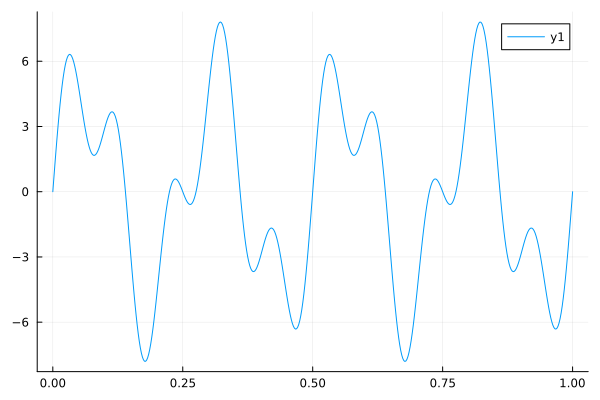

In [64]:
plot(t,y)

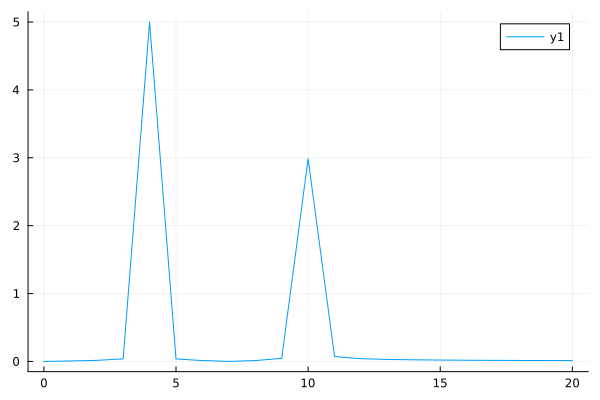

In [67]:
crop = 1:21 # Just frequencies up to 20
Z = abs.(Y) .* (2/N) # Normalization
plot(k[crop], Z[crop])

Recall the function was $y(t)=5\sin(2\pi\cdot 4t) + 3\sin(2\pi\cdot 10t)$